In [1]:
%matplotlib inline

from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns # improves appearance of matplotlib
import datetime
from scipy.stats import fisher_exact

sns.set_style('darkgrid')

In [2]:
def adjusted_mortality(p_exp, p_con):
    """
    Treatment group mortality (p_exp) adjusted for experimental control group mortality (p_con)
    using Abbott's formula.
    """
    return ((p_exp - p_con) / (1.0 - p_con))

## Here are the data with some simple calculations

In [3]:
obs_dates = ['2016-06-03', '2016-06-10', '2016-06-17', '2016-06-24', '2016-07-01']
obs_dates = [datetime.datetime.strptime(x, "%Y-%m-%d") for x in obs_dates]
virus_total = 62
control_total = 62
virus_mortality = [0, 37, 14, 2, 2]
control_mortality = [0, 5, 5, 2, 7]
virus_mortality_p = [x/virus_total for x in virus_mortality]
control_mortality_p = [x/control_total for x in control_mortality]
virus_mortality_p

[0.0,
 0.5967741935483871,
 0.22580645161290322,
 0.03225806451612903,
 0.03225806451612903]

## Perform the Fisher's exact test to see if mortality of virus treated beetles is significantly different from that of the control beetles

In [4]:
def fishers_test(virus_dead, virus_alive, control_dead, control_alive):
    oddsratio, pvalue = fisher_exact([[virus_dead, virus_alive], [control_dead, control_alive]], alternative='greater')
    msg = '''
    Mortality of virus-treated beetles (%.2f) is significantly greater than that of control beetles (%.2f);
    p = %.4f; Fisher's exact test.
    ''' % (virus_dead/virus_total, control_dead/control_total, pvalue)
    return msg

In [5]:
virus_dead = sum(virus_mortality)
virus_alive = virus_total - virus_dead
control_dead = sum(control_mortality)
control_alive = control_total - control_dead
fishers_test(virus_dead, virus_alive, control_dead, control_alive)

"\n    Mortality of virus-treated beetles (0.89) is significantly greater than that of control beetles (0.31);\n    p = 0.0000; Fisher's exact test.\n    "

In [6]:
adjusted_virus_mortality = adjusted_mortality(virus_dead/virus_total, control_dead/control_total)
adjusted_virus_mortality

0.8372093023255812

## Plot cumulative mortality and save in a PDF file

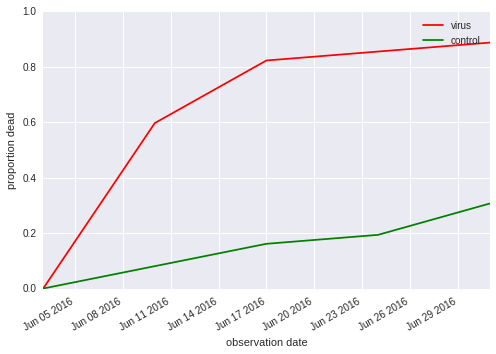

In [7]:
fig, ax = plt.subplots(1)
#ax.plot(r.date, r.close)
ax.plot(obs_dates, np.cumsum(virus_mortality_p), label='virus', color='red')
ax.plot(obs_dates, np.cumsum(control_mortality_p), label='control', color='green')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
import matplotlib.dates as mdates
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_ylim(0,1)
ax.legend()
ax.set_ylabel('proportion dead')
ax.set_xlabel('observation date')
fig.savefig('wb4_mortality.pdf')

## Write the Technical Report using Latex markup and save to a file

In [8]:
%%writefile wb4.tex

\documentclass[letterpaper,11pt]{scrartcl}
\usepackage{graphicx}
\usepackage{fullpage}

\titlehead{Guam Coconut Rhinoceros Project Technical Report}
\title{OrNV Witch's Brew Experiment 4: A Last Ditch Attempt to Find Virus Pathogenetic for the Guam Coconut
Rhinoceros Beetle Genotype}
\author{Aubrey Moore, Ian Iriarte and Roland Quitugua}

\begin{document}

\maketitle

\begin{abstract}
Bioassays of several isolates of Oryctes nudivirus provided by AgriResearch New Zealand failed to result in 
significant pathogenicity for the Guam CRB genotype. In a 'last ditch' attempt we made a 'witches brew' slurry 
containing all frozen dead beetles from previous the Witch's Brew 3 bioassay. Sixty-two 
adult beetles were forced to swim in the slurry for 30 minutes on June 3, 2016. A control group of
62 beetles were forced to swim in water. Beetles were checked weekly.

By July 1, 2016, mortality of the virus treated beetles (89\%) was significantly greater than that of the
control group (31\%). Treatment mortality corrected for experimental control mortality by Abbott's 
formula was 84\%.
\end{abstract}

\section*{Methods}

Frozen, dead beetles from previous bioassays were added to one liter of water and made into an aqueous slurry
using a blender.  The slurry was poured into a small pail and
62 were made to swim in this for thirty minutes. A control group of 62 beetles was made to swim in water for 
thirty minutes.

Beetles were kept in a large container filled with moist, commercially blended steer manure and soil. 
All beetles were checked weekly. Dead beetles were recorded and frozen.

\section*{Analysis}

Data were analyzed using an IPython notebook (file name = 'witchesBrew4.ipynb'). Significance of differences in mortality
were determined using a Fisher's exact test, and final mortality was adjusted using Abbott's formula.

\section*{Results and Discussion}

Cumulative mortality of virus-treated beetles (89\%) on July 1, 2016 (Fig. \ref{mortality}) was significantly greater than that of 
control beetles (31\%); (p = 0.0000; Fisher's exact test). Treatment mortality corrected for experimental control mortality by Abbott's 
formula was 84\%.

% FIGURES HERE 
%%%%%%%%%%%%%%
 
\begin{figure}
\centering
\includegraphics[width = \textwidth]{wb4_mortality.pdf}
\caption{Cumulative mortality.}
\label{mortality}
\end{figure} 
 
% END OF FIGURES
%%%%%%%%%%%%%%%%
 
%\nocite{PER-GRA_2007}
%\bibliographystyle{unsrt}
%\bibliography{ref}

\end{document}

Writing wb4.tex


## Generate a PDF version of the Tech Report and display it

In [9]:
%%bash

#use pandoc to convert section one to tex code from markdown
# pandoc -f markdown -t latex section1.txt -o section1.tex 

#run the standard bibtex and pdflatex commands to generate your final pdf

# bibtex test2
pdflatex wb4.tex
xdg-open wb4.pdf

This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013/Debian)
 restricted \write18 enabled.
entering extended mode
(./wb4.tex
LaTeX2e <2011/06/27>
Babel <3.9h> and hyphenation patterns for 78 languages loaded.
(/usr/share/texlive/texmf-dist/tex/latex/koma-script/scrartcl.cls
Document Class: scrartcl 2013/12/19 v3.12 KOMA-Script document class (article)
(/usr/share/texlive/texmf-dist/tex/latex/koma-script/scrkbase.sty
(/usr/share/texlive/texmf-dist/tex/latex/koma-script/scrbase.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/latex/koma-script/scrlfile.sty
Package scrlfile, 2013/12/19 v3.12 KOMA-Script package (loading files)
                  Copyright (C) Markus Kohm

))) (/usr/share/texlive/texmf-dist/tex/latex/koma-script/tocbasic.sty)
(/usr/share/texlive/texmf-dist/tex/latex/koma-script/scrsize11pt.clo)
(/usr/share/texlive/texmf-dist/tex/latex/koma-script/typearea.sty
Package typearea, 2013/12/19 v3.12 KOMA-Script package (